# Initial Steps

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Dehire\Plastic\cleaned_monthly_Plastic_data.csv", parse_dates=['date'])
df = df.set_index('date')
df

quantity
date                
2019-12-01     10942
2020-01-01     11941
2020-02-01     12103
2020-03-01     12793
2020-04-01     12169
2020-05-01     12374
2020-06-01     12185
2020-07-01     12389
2020-08-01     12345
2020-09-01     12149
2020-10-01     12642
2020-11-01     12891
2020-12-01     11789
2021-01-01     12788
2021-02-01     12950
2021-03-01     13640
2021-04-01     13016
2021-05-01     13221
2021-06-01     13032
2021-07-01     13236
2021-08-01     13192
2021-09-01     12996
2021-10-01     13489
2021-11-01     13738
2021-12-01     12636
2022-01-01     13635
2022-02-01     13797
2022-03-01     14487
2022-04-01     13863
2022-05-01     14068
2022-06-01     13879
2022-07-01     14083
2022-08-01     14039
2022-09-01     13844
2022-10-01     14336
2022-11-01     14585

# Preparing Data For Data Driven Forecasting

## Importing Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt Winter's Exponential Smoothing

## Creating MAPE Function

In [3]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Splitting Data

In [4]:
Train = df.drop(df.tail(12).index)
Train

quantity
date                
2019-12-01     10942
2020-01-01     11941
2020-02-01     12103
2020-03-01     12793
2020-04-01     12169
2020-05-01     12374
2020-06-01     12185
2020-07-01     12389
2020-08-01     12345
2020-09-01     12149
2020-10-01     12642
2020-11-01     12891
2020-12-01     11789
2021-01-01     12788
2021-02-01     12950
2021-03-01     13640
2021-04-01     13016
2021-05-01     13221
2021-06-01     13032
2021-07-01     13236
2021-08-01     13192
2021-09-01     12996
2021-10-01     13489
2021-11-01     13738

In [5]:
Test = df.tail(12)
Test

quantity
date                
2021-12-01     12636
2022-01-01     13635
2022-02-01     13797
2022-03-01     14487
2022-04-01     13863
2022-05-01     14068
2022-06-01     13879
2022-07-01     14083
2022-08-01     14039
2022-09-01     13844
2022-10-01     14336
2022-11-01     14585

# Model Building

## 1. Moving Average

In [6]:
# Moving Average for the time series
mv_pred = df["quantity"].rolling(12).mean()
mv_pred.tail(12)
MAPE(mv_pred.tail(12), Test.quantity)

3.3994751505217162

## 2. Simple Exponential Smoothing

In [7]:
ses_model = SimpleExpSmoothing(Train["quantity"]).fit()
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses, Test.quantity)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


3.3556049250608964

## 3. Holt's method 

In [8]:
hw_model = Holt(Train["quantity"]).fit()
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw, Test.quantity) 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


8.272835801851663

## 4. Holts Winter Exponential Smoothing with Additive Seasonality & Additive Trend

In [9]:
hwe_model_add_add = ExponentialSmoothing(Train["quantity"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_add_add, Test.quantity) 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


0.0006019913209005227

## 5. Holts Winter Exponential Smoothing with Multiplicative Seasonality & Additive Trend

In [10]:
hwe_model_mul_add = ExponentialSmoothing(Train["quantity"], seasonal = "mul", trend = "add", seasonal_periods = 12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_mul_add, Test.quantity) 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


0.16403006831984085

# Forecasting

## 1. Getting Data For Forecasting

In [11]:
forecast_data_path = "C:/Users/hp/Downloads/1111/Dehire/Plastic/plastic_data_to_forecast.csv"

In [12]:
df2 = pd.read_csv(forecast_data_path, parse_dates=['date'])
df2 = df2.set_index('date')
df2

Empty DataFrame
Columns: []
Index: [2022-12-01 00:00:00, 2023-01-01 00:00:00, 2023-02-01 00:00:00, 2023-03-01 00:00:00, 2023-04-01 00:00:00, 2023-05-01 00:00:00, 2023-06-01 00:00:00, 2023-07-01 00:00:00, 2023-08-01 00:00:00, 2023-09-01 00:00:00, 2023-10-01 00:00:00, 2023-11-01 00:00:00]

## 3. Best Model

In [13]:
model_full = ExponentialSmoothing(df["quantity"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## 4. Forecasting

In [14]:
pred_new = pd.Series(model_full.predict(start = df2.index[0], end = df2.index[-1]))
pred_new

2022-12-01    13483.083347
2023-01-01    14482.083365
2023-02-01    14644.083288
2023-03-01    15334.083372
2023-04-01    14710.083349
2023-05-01    14915.083252
2023-06-01    14726.083390
2023-07-01    14930.083355
2023-08-01    14886.083320
2023-09-01    14690.416638
2023-10-01    15183.083292
2023-11-01    15432.083375
Freq: MS, dtype: float64

In [15]:
df2["forecasted_quantity"] = pd.Series(pred_new)
df2

forecasted_quantity
date                           
2022-12-01         13483.083347
2023-01-01         14482.083365
2023-02-01         14644.083288
2023-03-01         15334.083372
2023-04-01         14710.083349
2023-05-01         14915.083252
2023-06-01         14726.083390
2023-07-01         14930.083355
2023-08-01         14886.083320
2023-09-01         14690.416638
2023-10-01         15183.083292
2023-11-01         15432.083375

## 5. Finding Residuals

In [16]:
full_res = df.quantity - model_full.predict(start = df.index[0], end = df.index[-1])
full_res

date
2019-12-01    0.041653
2020-01-01    0.041635
2020-02-01    0.041712
2020-03-01    0.041628
2020-04-01    0.041651
2020-05-01    0.041748
2020-06-01    0.041610
2020-07-01    0.041645
2020-08-01    0.041680
2020-09-01   -0.291638
2020-10-01    0.041708
2020-11-01    0.041625
2020-12-01   -0.000013
2021-01-01   -0.000031
2021-02-01    0.000046
2021-03-01   -0.000039
2021-04-01   -0.000016
2021-05-01    0.000082
2021-06-01   -0.000057
2021-07-01   -0.000022
2021-08-01    0.000013
2021-09-01   -0.333304
2021-10-01    0.000041
2021-11-01   -0.000042
2021-12-01   -0.041680
2022-01-01   -0.041698
2022-02-01   -0.041621
2022-03-01   -0.041705
2022-04-01   -0.041683
2022-05-01   -0.041585
2022-06-01   -0.041723
2022-07-01   -0.041688
2022-08-01   -0.041653
2022-09-01    0.625029
2022-10-01   -0.041626
2022-11-01   -0.041709
dtype: float64

## 6. ACF Plot on Residuals

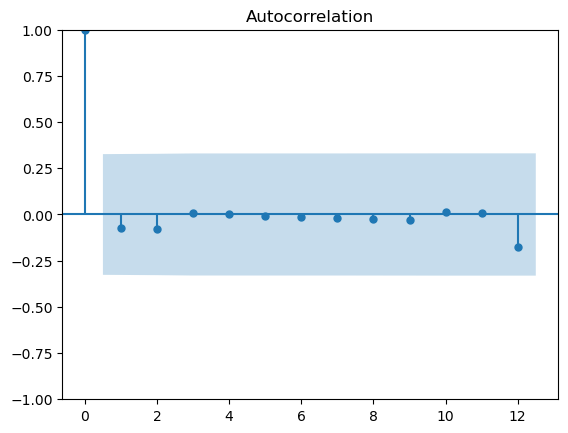

In [17]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(full_res, lags = 12);

## 7. PACF Plot on Residuals

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


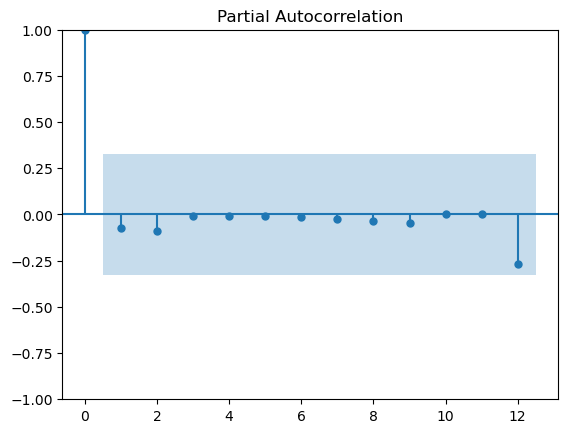

In [18]:
tsa_plots.plot_pacf(full_res, lags=12);

## 8. Autoregression Model

In [19]:
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[1])
# model_ar = AutoReg(Train_res, lags=5)
model_fit = model_ar.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
print('Coefficients: %s' % model_fit.params)
pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(df2)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)
pred_res

Coefficients: const   -0.001105
y.L1    -0.072348
dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


0     0.001913
1    -0.001243
2    -0.001015
3    -0.001031
4    -0.001030
5    -0.001030
6    -0.001030
7    -0.001030
8    -0.001030
9    -0.001030
10   -0.001030
11   -0.001030
dtype: float64

In [21]:
df3 = pd.concat([df2.reset_index(), pred_res], axis=1)
df3 = df3.set_index('date')
df3 = df3.rename(columns = {0:'Residuals'})
df3

forecasted_quantity  Residuals
date                                      
2022-12-01         13483.083347   0.001913
2023-01-01         14482.083365  -0.001243
2023-02-01         14644.083288  -0.001015
2023-03-01         15334.083372  -0.001031
2023-04-01         14710.083349  -0.001030
2023-05-01         14915.083252  -0.001030
2023-06-01         14726.083390  -0.001030
2023-07-01         14930.083355  -0.001030
2023-08-01         14886.083320  -0.001030
2023-09-01         14690.416638  -0.001030
2023-10-01         15183.083292  -0.001030
2023-11-01         15432.083375  -0.001030

In [22]:
df3['final_forecast'] = df3['Residuals'] + df3['forecasted_quantity']
df3

forecasted_quantity  Residuals  final_forecast
date                                                      
2022-12-01         13483.083347   0.001913    13483.085260
2023-01-01         14482.083365  -0.001243    14482.082122
2023-02-01         14644.083288  -0.001015    14644.082273
2023-03-01         15334.083372  -0.001031    15334.082341
2023-04-01         14710.083349  -0.001030    14710.082319
2023-05-01         14915.083252  -0.001030    14915.082222
2023-06-01         14726.083390  -0.001030    14726.082360
2023-07-01         14930.083355  -0.001030    14930.082325
2023-08-01         14886.083320  -0.001030    14886.082290
2023-09-01         14690.416638  -0.001030    14690.415608
2023-10-01         15183.083292  -0.001030    15183.082262
2023-11-01         15432.083375  -0.001030    15432.082345

# Forecasting Result

<AxesSubplot:xlabel='date'>

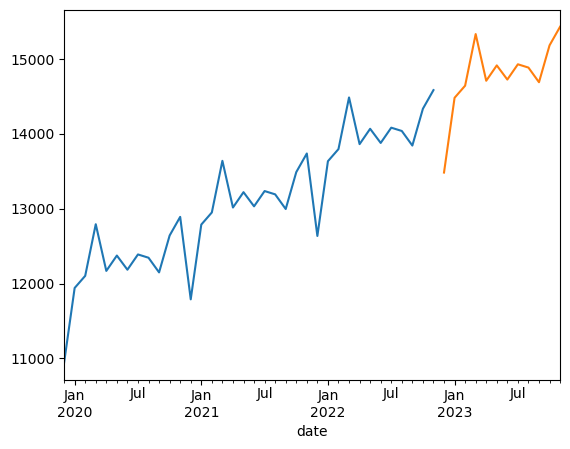

In [23]:
df.quantity.plot()
df3.final_forecast.plot()

# Saving Forecasted Data

In [24]:
df3.to_csv('data_driven_Forecasted_Data.csv',encoding='utf-8')
import os
os.getcwd()

'C:\\Users\\hp\\Downloads\\1111\\Dehire\\Plastic'